

# Project: tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
in this project i will work on the TMDB movies 
that data set include information about a huge number of films including thier budget,revenue ,genres,release year and more
# questions about this data set
1-which genres become more popular over years ?                                                                                   
2-what is the properties of films that generated high profits ?                                                                     
3- what is generes of the films that most produced in the recent years ?                                                          
4-Does the number of films produced every year incease or degrease?

In [99]:
# importing libraries we want
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [100]:
# loading the data and print the first rows in it 
df_films=pd.read_csv("tmdb-movies.csv")
df_films.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [101]:
df_films.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


 from the describion of the data we see that more than 50% of budget data is zero values                                         so when deaking with this columns we have to remove this zero values                                                          also we see that many columns are not useful in our analysis so, we have to drop them from the data set                          firstly, Droping those rows that we does not need in our analysis

In [102]:
df_films.drop(["id","imdb_id","cast","keywords","tagline","overview","homepage"],axis=1,inplace=True)

secondly,makinig a new data frame (df_zeros) which contains rows with zero values in budget and revenue colomns

In [103]:
df_zeros=df_films[np.logical_or(df_films["budget_adj"]==0 , df_films["revenue_adj"]==0)]
df_zeros.shape

(7011, 14)

makinig a new data frame (df_cleaned) which drop the zero values from budget and revenue colomns and adding a a new column to it 

In [104]:
df_cleaned=df_films.drop(df_zeros.index)

In [105]:
df_cleaned["profits_adj"]=df_cleaned["revenue_adj"]-df_cleaned["budget_adj"]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3855 non-null float64
budget                  3855 non-null int64
revenue                 3855 non-null int64
original_title          3855 non-null object
director                3854 non-null object
runtime                 3855 non-null int64
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null object
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
profits_adj             3855 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 481.9+ KB


Expliting the genres coiulmns as we could easily investigate it
the code used here is from this link https://programmer.ink/think/pandas-how-do-i-split-text-in-a-column-into-multiple-lines-python.html

In [106]:
df_films=df_films.drop('genres', axis=1).join(df_films['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df_films.head()

,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 :what kinds of generes become popular over years?

to answer this question we are going to draw between year and popularity for each genre 
for making it easy we will only include genres with a high number of films produced 

In [107]:
df_films["genres"].value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

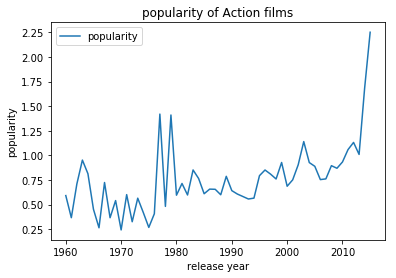

In [108]:
action=df_films[df_films["genres"]=="Action"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
action.set(xlabel="release year",ylabel="popularity",title="popularity of Action films");

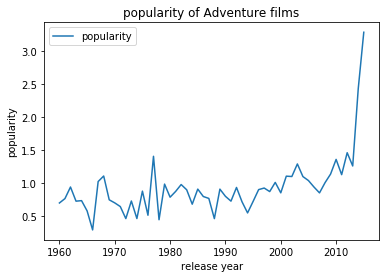

In [109]:
adven=df_films[df_films["genres"]=="Adventure"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
adven.set(xlabel="release year",ylabel="popularity",title="popularity of Adventure films");

[Text(0,0.5,'popularity'),
 Text(0.5,0,'release year'),
 Text(0.5,1,'popularity of Science Fiction films')]

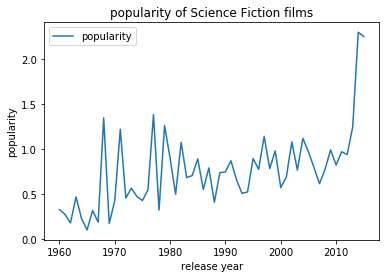

In [110]:
scf=df_films[df_films["genres"]=="Science Fiction"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
scf.set(xlabel="release year",ylabel="popularity",title="popularity of Science Fiction films")

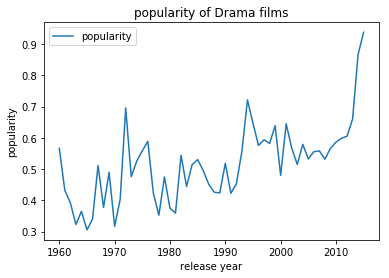

In [111]:
drama=df_films[df_films["genres"]=="Drama"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
drama.set(xlabel="release year",ylabel="popularity",title="popularity of Drama films");


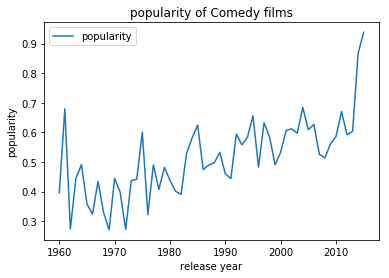

In [112]:
comedy=df_films[df_films["genres"]=="Comedy"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
comedy.set(xlabel="release year",ylabel="popularity",title="popularity of Comedy films");

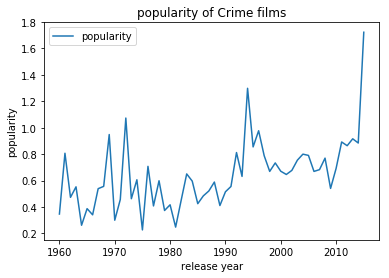

In [113]:
crime=df_films[df_films["genres"]=="Crime"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
crime.set(xlabel="release year",ylabel="popularity",title="popularity of Crime films");

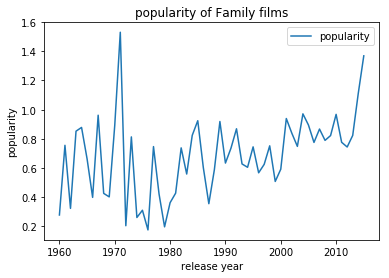

In [114]:
family=df_films[df_films["genres"]=="Family"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
family.set(xlabel="release year",ylabel="popularity",title="popularity of Family films");

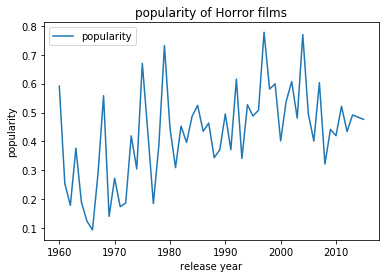

In [115]:
horror=df_films[df_films["genres"]=="Horror"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
horror.set(xlabel="release year",ylabel="popularity",title="popularity of Horror films");

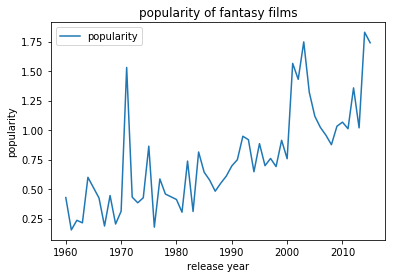

In [116]:
fantasy=df_films[df_films["genres"]=="Fantasy"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
fantasy.set(xlabel="release year",ylabel="popularity",title="popularity of fantasy films");

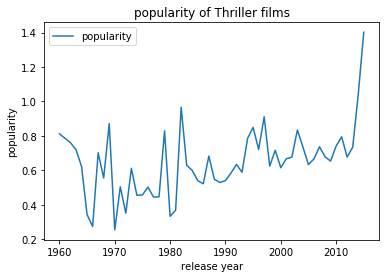

In [117]:
thrl=df_films[df_films["genres"]=="Thriller"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
thrl.set(xlabel="release year",ylabel="popularity",title="popularity of Thriller films");

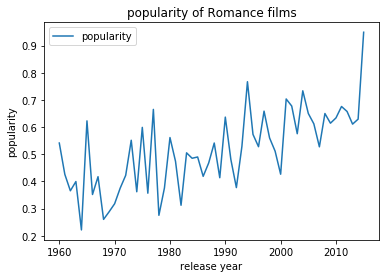

In [118]:
romance=df_films[df_films["genres"]=="Romance"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
romance.set(xlabel="release year",ylabel="popularity",title="popularity of Romance films");

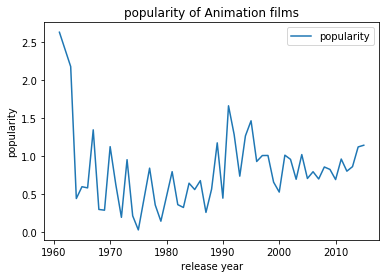

In [119]:
anim=df_films[df_films["genres"]=="Animation"].groupby("release_year")["popularity"].mean().plot(kind="line",legend="popularity")
anim.set(xlabel="release year",ylabel="popularity",title="popularity of Animation films");

# answering the first question 
the could see from the above explanation action ,adevenure,drama,thriller become more popular thoe days 
also we note that romance,comedy and family become more popular over years
on the other hand we see that horror and science fiction films become less popular over years

### Research Question 2  :what are the properties associated with films that have high profits?

for answerig this qustion we will take the profit column and it's relation with other variables

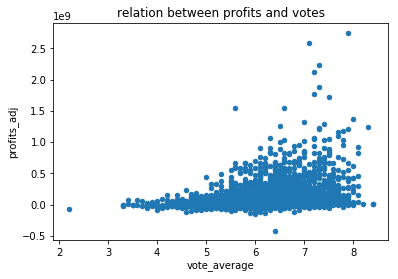

In [120]:
df_cleaned.plot(x="vote_average",y="profits_adj",kind="scatter",title="relation between profits and votes")

from this scatter plot we could find that films with high profits should have high average votes

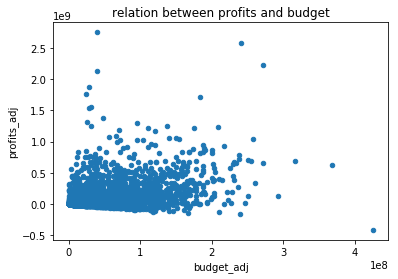

In [121]:
df_cleaned.plot(x="budget_adj",y="profits_adj",kind="scatter",title="relation between profits and budget")

from this scatter plot we could find that budget of the film is not sign of the profits of the film 

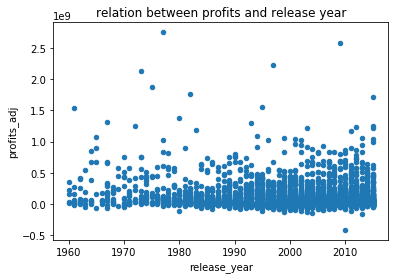

In [122]:
df_cleaned.plot(x="release_year",y="profits_adj",kind="scatter",title="relation between profits and release year")

from this scatter plot we could find that old films(1960:1980) have higher average profits than those new ones
and also there are much films produced this years than before

# what is generes of the films that most produced in the recent years ?

[Text(0,0.5,'number of films produced wih this genre')]

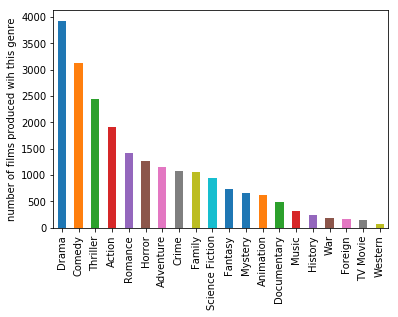

In [123]:
genres_produced=df_films[df_films["release_year"]>=1990]["genres"].value_counts().plot(kind="bar")
genres_produced.set(ylabel="number of films produced wih this genre")

from the analysis of popular genres over years we find that Drama,Action, thriller,adventure and comedy is the generers that get more popular over years and this is the reason why many films of this genres is produced nowadays 

# Does the number of films produced every year incease or degrease?

[Text(0,0.5,'number of films produced'), Text(0.5,0,'release year')]

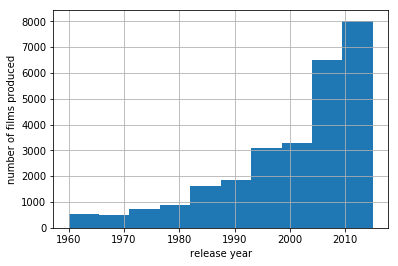

In [124]:
films=df_films["release_year"].hist()
films.set(ylabel="number of films produced",xlabel="release year")

the histogram is left_skwed declaring that more films produced each year

<a id='conclusions'></a>
## Conclusions
### limitations of the analysis:
the anlysis of the profits_adj is only for the data that doen not contain zero values in the data set(about 40% of the original data
### results of analysis  
from analysing this data set we can conclude that:
1-Adevenure,drama and thriller genres become more popular thoe days also we note that romance,comedy and family become more popular over years on the other hand we see that horror and science fiction films become less popular over years                       

2-films with high profits should have high average votes but not actually a higher budget                                           

3-from the analysis of popular genres over years we find that Drama,Action, thriller,adventure and comedy is the generers that get more popular over years and this is the reason why many films of this genres is produced nowadays                                

4-more films are produced each year than the past year




In [125]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0